# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import glob
from matplotlib.dates import drange
import matplotlib.dates as mdates
import os

# Configs

In [2]:
class cfg:
    local = False

    num_month_splits = 5

In [3]:
file_paths_save = {
}

In [4]:
def create_dir(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

In [5]:
file_paths_save = {
}

if cfg.local:
    save_dir = '../../data/prepared_data'
else:
    save_dir = '/kaggle/working/prepared_data'

file_paths_save[f'train_prepared'] = []
file_paths_save[f'val_prepared'] = []
file_paths_save[f'test_prepared'] = []
for i in range(cfg.num_month_splits):
    file_paths_save[f'train_prepared'].append(f'{save_dir}/train/train_{i}.parquet')
    create_dir(f'{save_dir}/train')
    file_paths_save[f'val_prepared'].append(f'{save_dir}/val/val_{i}.parquet')
    create_dir(f'{save_dir}/val')
file_paths_save[f'test_prepared'].append(f'{save_dir}/test/test_0.parquet')
create_dir(f'{save_dir}/test')

display(file_paths_save['val_prepared'])
display(file_paths_save['test_prepared'])

['/kaggle/working/prepared_data/val/val_0.parquet',
 '/kaggle/working/prepared_data/val/val_1.parquet',
 '/kaggle/working/prepared_data/val/val_2.parquet',
 '/kaggle/working/prepared_data/val/val_3.parquet',
 '/kaggle/working/prepared_data/val/val_4.parquet']

['/kaggle/working/prepared_data/test/test_0.parquet']

In [6]:
if cfg.local:
    save_dir = '../../data/features_data'
else:
    save_dir = '/kaggle/working/features_data'

file_paths_save[f'train_features'] = []
file_paths_save[f'val_features'] = []
file_paths_save[f'test_features'] = []
for i in range(cfg.num_month_splits):
    file_paths_save[f'train_features'].append(f'{save_dir}/train/train_{i}.parquet')
    create_dir(f'{save_dir}/train')
    file_paths_save[f'val_features'].append(f'{save_dir}/val/val_{i}.parquet')
    create_dir(f'{save_dir}/val')
file_paths_save[f'test_features'].append(f'{save_dir}/test/test_0.parquet')
create_dir(f'{save_dir}/test')

display(file_paths_save['val_features'])
display(file_paths_save['test_features'])

['/kaggle/working/features_data/val/val_0.parquet',
 '/kaggle/working/features_data/val/val_1.parquet',
 '/kaggle/working/features_data/val/val_2.parquet',
 '/kaggle/working/features_data/val/val_3.parquet',
 '/kaggle/working/features_data/val/val_4.parquet']

['/kaggle/working/features_data/test/test_0.parquet']

In [7]:
file_paths_save

{'train_prepared': ['/kaggle/working/prepared_data/train/train_0.parquet',
  '/kaggle/working/prepared_data/train/train_1.parquet',
  '/kaggle/working/prepared_data/train/train_2.parquet',
  '/kaggle/working/prepared_data/train/train_3.parquet',
  '/kaggle/working/prepared_data/train/train_4.parquet'],
 'val_prepared': ['/kaggle/working/prepared_data/val/val_0.parquet',
  '/kaggle/working/prepared_data/val/val_1.parquet',
  '/kaggle/working/prepared_data/val/val_2.parquet',
  '/kaggle/working/prepared_data/val/val_3.parquet',
  '/kaggle/working/prepared_data/val/val_4.parquet'],
 'test_prepared': ['/kaggle/working/prepared_data/test/test_0.parquet'],
 'train_features': ['/kaggle/working/features_data/train/train_0.parquet',
  '/kaggle/working/features_data/train/train_1.parquet',
  '/kaggle/working/features_data/train/train_2.parquet',
  '/kaggle/working/features_data/train/train_3.parquet',
  '/kaggle/working/features_data/train/train_4.parquet'],
 'val_features': ['/kaggle/working/fe

In [8]:
if cfg.local:
    data_dir = '../../data/original_data_updated'
    split_data_dir = '../../data/split_data'
else:
    data_dir = '/kaggle/input/godaddy-microbusiness-density-forecasting'
    split_data_dir = '/kaggle/input/microbusiness-split-data'

file_paths = {
    'train': f'{data_dir}/train.csv',
    'test': f'{data_dir}/test.csv',
    'census_starter': f'{data_dir}/census_starter.csv',
    'sample_submission': f'{data_dir}/sample_submission.csv',
    
    'counties_coordinates': '/kaggle/input/usa-counties-coordinates/cfips_location.csv',
    'google_trends': '/kaggle/input/microbusiness-additional-ds/google_trends.parquet',
    
    'train_splits': glob.glob(f'{split_data_dir}/train/train_*.parquet'),
    'val_splits': glob.glob(f'{split_data_dir}/val/val_*.parquet'),
    'test_splits': glob.glob(f'{split_data_dir}/test/test_*.parquet'),
    
    
}

file_paths

{'train': '/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv',
 'test': '/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv',
 'census_starter': '/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv',
 'sample_submission': '/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv',
 'counties_coordinates': '/kaggle/input/usa-counties-coordinates/cfips_location.csv',
 'google_trends': '/kaggle/input/microbusiness-additional-ds/google_trends.parquet',
 'train_splits': ['/kaggle/input/microbusiness-split-data/train/train_3.parquet',
  '/kaggle/input/microbusiness-split-data/train/train_2.parquet',
  '/kaggle/input/microbusiness-split-data/train/train_0.parquet',
  '/kaggle/input/microbusiness-split-data/train/train_4.parquet',
  '/kaggle/input/microbusiness-split-data/train/train_1.parquet'],
 'val_splits': ['/kaggle/input/microbusiness-split-data/val/val_4.parquet',
  '/kaggle/input/microbusiness-split-data/val/val_

In [9]:
file_paths['train_splits'].sort()
file_paths['val_splits'].sort()
file_paths['test_splits'].sort()

# Helpers

In [11]:
def preview_df(df, num=1):
    print(f'{len(df):,}')
    display(df.head(num))

In [12]:
def plot_cfips(df, cfips_li, col='microbusiness_density'):
    tmp = df.loc[df.cfips.isin(cfips_li)]
    tmp = tmp.sort_values('first_day_of_month', ascending=True)
    groups = tmp.groupby('county')
    plt.figure(figsize=(16,5))
    for county_name, group_df in groups:
        label = county_name.split(' ')[:-1]
        label = ' '.join(label)
        assert len(group_df.state.unique())==1
        label = group_df.state.unique()[0] + ', ' + label
        plt.plot(group_df.first_day_of_month, group_df[col], label=label)

    del groups

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.grid()
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

In [13]:
def subtract_month(from_date, sub_amount=1):
    assert sub_amount <= 12

    new_year = from_date.year
    new_month = from_date.month

    new_month = new_month - sub_amount
    if new_month <= 0:
        new_month = 12 + new_month
        new_year = new_year - 1

    return datetime.date(new_year, new_month, from_date.day)

def add_month(from_date, add_amount=1):
    assert add_amount <= 12

    new_year = from_date.year
    new_month = from_date.month

    new_month = new_month + add_amount
    if new_month > 12:
        new_month = new_month - 12
        new_year = new_year + 1

    return datetime.date(new_year, new_month, from_date.day)

# Test:
# last_date = datetime.date(2023,3,1) # not including march
# first_date = datetime.date(2019,8,1) # not including march
# for i in range(0,6):
#     # print(subtract_month(last_date, i))
#     print(add_month(first_date, i))

# Statistics features

### Check Separate target cols

In [15]:
target_months = 5
for split in range(cfg.num_month_splits):
    f1 = file_paths['train_splits'][split]
    print(f1)
    train_df = pd.read_parquet(f1)
    print('Train', train_df.first_day_of_month.min(), train_df.first_day_of_month.max())
    first_target_month = subtract_month(train_df.first_day_of_month.max(), target_months-1)
    train_features_df = train_df.loc[train_df.first_day_of_month < first_target_month].copy()
    print('Train features months', train_features_df.first_day_of_month.min(), train_features_df.first_day_of_month.max())
    print()

    f2 = file_paths['val_splits'][split]
    print(f2)
    val_df = pd.read_parquet(f2)
    print('Val', val_df.first_day_of_month.min(), val_df.first_day_of_month.max())
    first_val_target_month = subtract_month(val_df.first_day_of_month.max(), target_months-1)
    val_features_df = val_df.loc[val_df.first_day_of_month < first_val_target_month].copy()
    print('Val features months', val_features_df.first_day_of_month.min(), val_features_df.first_day_of_month.max())
    print()

    if split == 0:
        f3 = file_paths['test_splits'][split]
        print(f3)
        test_df = pd.read_parquet(f3)
        print('Test', test_df.first_day_of_month.min(), test_df.first_day_of_month.max())
        first_target_month = subtract_month(test_df.first_day_of_month.max(), target_months-1)
        test_features_df = test_df.loc[test_df.first_day_of_month < first_target_month].copy()
        print('test features months', test_features_df.first_day_of_month.min(), test_features_df.first_day_of_month.max())
    print()

/kaggle/input/microbusiness-split-data/train/train_0.parquet
Train 2019-08-01 2022-07-01
Train features months 2019-08-01 2022-02-01

/kaggle/input/microbusiness-split-data/val/val_0.parquet
Val 2020-01-01 2022-12-01
Val features months 2020-01-01 2022-07-01

/kaggle/input/microbusiness-split-data/test/test_0.parquet
Test 2020-06-01 2023-05-01
test features months 2020-06-01 2022-12-01

/kaggle/input/microbusiness-split-data/train/train_1.parquet
Train 2019-08-01 2022-06-01
Train features months 2019-08-01 2022-01-01

/kaggle/input/microbusiness-split-data/val/val_1.parquet
Val 2020-01-01 2022-11-01
Val features months 2020-01-01 2022-06-01


/kaggle/input/microbusiness-split-data/train/train_2.parquet
Train 2019-08-01 2022-05-01
Train features months 2019-08-01 2021-12-01

/kaggle/input/microbusiness-split-data/val/val_2.parquet
Val 2020-01-01 2022-10-01
Val features months 2020-01-01 2022-05-01


/kaggle/input/microbusiness-split-data/train/train_3.parquet
Train 2019-08-01 2022-04-01

### Stats

In [16]:
def add_months_num_reverse_chrono(df):
    df = df.sort_values(['cfips', 'first_day_of_month'], ascending=[True, False]).reset_index(drop=True)
    df['months_num_reverse'] = df.groupby('cfips', sort=False).cumcount()
    df = df.sort_values(['cfips', 'first_day_of_month'], ascending=[True, True]).reset_index(drop=True)
    return df

In [17]:
def mean_last_months(df, num_months, col='microbusiness_density'):
    tmp = df.loc[df.months_num_reverse < num_months]
    df = pd.merge(df, tmp.groupby('cfips')[col].mean().reset_index(name=f'mean_{num_months}'), on='cfips', how='left')
    return df
def median_last_months(df, num_months, col='microbusiness_density'):
    tmp = df.loc[df.months_num_reverse < num_months]
    df = pd.merge(df, tmp.groupby('cfips')[col].median().reset_index(name=f'median_{num_months}'), on='cfips', how='left')
    return df

In [19]:
def stats_last_months(df, num_months, col='microbusiness_density', new_col_suff=''):
    tmp = df.loc[df.months_num_reverse < num_months]
    df = pd.merge(df, tmp.groupby('cfips')[col].mean().reset_index(name=f'mean_{num_months}{new_col_suff}'), on='cfips', how='left')
    df = pd.merge(df, tmp.groupby('cfips')[col].median().reset_index(name=f'median_{num_months}{new_col_suff}'), on='cfips', how='left')
    df[f'mean_med_diff_{num_months}{new_col_suff}'] = df[f'mean_{num_months}{new_col_suff}'] - df[f'median_{num_months}{new_col_suff}']

    
    df = pd.merge(df, tmp.groupby('cfips')[col].min().reset_index(name=f'min_{num_months}{new_col_suff}'), on='cfips', how='left')
    df = pd.merge(df, tmp.groupby('cfips')[col].max().reset_index(name=f'max_{num_months}{new_col_suff}'), on='cfips', how='left')

    df = pd.merge(df, df.groupby('cfips')[col].min().reset_index(name=f'min_all{new_col_suff}'), on='cfips', how='left')
    df = pd.merge(df, df.groupby('cfips')[col].max().reset_index(name=f'max_all{new_col_suff}'), on='cfips', how='left')
    
    return df

### Density difference stats

In [20]:
def add_density_diff_cols(df, num_months=12):
    df['mb_dens_diff'] = df.groupby('cfips').microbusiness_density.shift(1)
    tmp = df.loc[df.months_num_reverse < num_months].copy()
    tmp.mb_dens_diff = tmp.microbusiness_density - tmp.mb_dens_diff
    del df['mb_dens_diff']

    groups_dens_diff = tmp.groupby('cfips').mb_dens_diff
    df = pd.merge(df, groups_dens_diff.max().reset_index(name=f'max_diff_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_dens_diff.min().reset_index(name=f'min_diff_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_dens_diff.median().reset_index(name=f'median_diff_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_dens_diff.mean().reset_index(name=f'mean_diff_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_dens_diff.var().reset_index(name=f'var_diff_{num_months}'), on='cfips', how='left')

    df = pd.merge(df, groups_dens_diff.take([-1]).reset_index(name='last_1_diff')[['cfips', 'last_1_diff']], on='cfips', how='left')
    df = pd.merge(df, groups_dens_diff.take([-2]).reset_index(name='last_2_diff')[['cfips', 'last_2_diff']], on='cfips', how='left')
    df = pd.merge(df, groups_dens_diff.take([-3]).reset_index(name='last_3_diff')[['cfips', 'last_3_diff']], on='cfips', how='left')

    return df

In [21]:
def add_active_diff_cols(df, num_months=12):
    df['mb_active_diff'] = df.groupby('cfips').active.shift(1)
    tmp = df.loc[df.months_num_reverse < num_months].copy()
    tmp.mb_active_diff = tmp.active - tmp.mb_active_diff
    del df['mb_active_diff']

    groups_active_diff = tmp.groupby('cfips').mb_active_diff
    df = pd.merge(df, groups_active_diff.max().reset_index(name=f'max_diff_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_active_diff.min().reset_index(name=f'min_diff_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_active_diff.median().reset_index(name=f'median_diff_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_active_diff.mean().reset_index(name=f'mean_diff_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_active_diff.var().reset_index(name=f'var_diff_{num_months}'), on='cfips', how='left')

    num_diff_months = 12
    for i in range(1,num_diff_months+1):
        df = pd.merge(df, groups_active_diff.take([-i]).reset_index(name=f'last_{i}_diff')[['cfips', f'last_{i}_diff']], on='cfips', how='left')

    return df

In [22]:
def add_active_diff_perc_cols(df, num_months=12):

    df['mb_active_diff'] = df.groupby('cfips').active.shift(1)
    tmp = df.loc[df.months_num_reverse < num_months].copy()
    tmp.mb_active_diff = tmp.active - tmp.mb_active_diff
    tmp['mb_active_diff_perc'] = tmp.mb_active_diff / (tmp.active+1e-6)
    tmp['mb_active_diff_perc'] = tmp['mb_active_diff_perc'].clip(-10,10)
    del df['mb_active_diff']

    groups_active_diff = tmp.groupby('cfips').mb_active_diff_perc
    df = pd.merge(df, groups_active_diff.max().reset_index(name=f'max_diff_perc_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_active_diff.min().reset_index(name=f'min_diff_perc_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_active_diff.median().reset_index(name=f'median_diff_perc_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_active_diff.mean().reset_index(name=f'mean_diff_perc_{num_months}'), on='cfips', how='left')
    df = pd.merge(df, groups_active_diff.var().reset_index(name=f'var_diff_perc_{num_months}'), on='cfips', how='left')

    for i in range(1,num_months+1):
        df = pd.merge(df, groups_active_diff.take([-i]).reset_index(name=f'last_{i}_diff_perc')[['cfips', f'last_{i}_diff_perc']], on='cfips', how='left')

    return df

In [23]:
def add_diff_perc_cols(df, col, num_months=12, new_cols_suff=''):

    df['cols_diff'] = df.groupby('cfips')[col].shift(1)
    tmp = df.loc[df.months_num_reverse < num_months].copy()
    tmp.cols_diff = tmp[col] - tmp.cols_diff
    tmp['cols_diff_perc'] = tmp.cols_diff / (tmp[col]+1e-6)
    tmp['cols_diff_perc'] = tmp['cols_diff_perc'].clip(-10,10)
    del df['cols_diff']

    groups_diff = tmp.groupby('cfips').cols_diff_perc
    df = pd.merge(df, groups_diff.max().reset_index(name=f'max_diff_perc_{num_months}{new_cols_suff}'), on='cfips', how='left')
    df = pd.merge(df, groups_diff.min().reset_index(name=f'min_diff_perc_{num_months}{new_cols_suff}'), on='cfips', how='left')
    df = pd.merge(df, groups_diff.median().reset_index(name=f'median_diff_perc_{num_months}{new_cols_suff}'), on='cfips', how='left')
    df = pd.merge(df, groups_diff.mean().reset_index(name=f'mean_diff_perc_{num_months}{new_cols_suff}'), on='cfips', how='left')
    df = pd.merge(df, groups_diff.var().reset_index(name=f'var_diff_perc_{num_months}{new_cols_suff}'), on='cfips', how='left')

    for i in range(1,num_months+1):
        df = pd.merge(
            df, 
            groups_diff.take([-i]).reset_index(name=f'last_{i}_diff_perc{new_cols_suff}')[['cfips', f'last_{i}_diff_perc{new_cols_suff}']], 
            on='cfips', how='left'
        )

    return df

### Google trends business searches

In [24]:
def add_state_code(df):
    df['state_code'] = df.cfips.apply(
        lambda x: int(str(x)[:2]) if x >= 10_000 else int(str(x)[:1])
    )

    if df.state_code.max() <= 255:
        df.state_code = df.state_code.astype('uint8')
    else:
        df.state_code = df.state_code.astype('int16')

    return df
def add_county_code(df):
    df['county_code'] = df.cfips.apply(
        lambda x: int(str(x)[-3:])
    )

    if df.county_code.max() <= 255:
        df.county_code = df.county_code.astype('uint8')
    else:
        df.county_code = df.county_code.astype('int16')

    return df

In [25]:
google_trends_df = pd.read_parquet(file_paths['google_trends'])
google_trends_df['first_day_of_month'] = google_trends_df.year.astype('str') + '-' + google_trends_df.month.astype('str') + '-1'
google_trends_df['first_day_of_month'] = pd.to_datetime(google_trends_df.first_day_of_month)

google_trends_df = google_trends_df.drop(['year', 'month'], axis=1)
google_trends_df = google_trends_df.drop(google_trends_df.loc[google_trends_df.state_code == -1].index).reset_index(drop=True)

google_trends_df.columns = ['state_code', 'micro_business', 'small_business', 'internet_business', 'side_job', 'first_day_of_month']

for k, v in google_trends_df.dtypes.items():
    if v == 'int32' or v == 'int64':
        google_trends_df[k] = pd.to_numeric(google_trends_df[k], downcast='signed')
    elif v=='float64':
        google_trends_df[k] = pd.to_numeric(google_trends_df[k], downcast='float')
        
google_trends_df['business_searched'] = 0
for col in ['micro_business', 'small_business', 'internet_business', 'side_job']:
    google_trends_df['business_searched'] += google_trends_df[col]

google_trends_df = google_trends_df.drop(['micro_business', 'small_business', 'internet_business', 'side_job'], axis=1)
preview_df(google_trends_df,4)

def add_business_searched_fields(split_features_df, google_trends_df):
    split_features_df = add_state_code(split_features_df)
    split_features_df.first_day_of_month = pd.to_datetime(split_features_df.first_day_of_month)
    split_features_df = pd.merge(split_features_df, google_trends_df, on=['state_code', 'first_day_of_month'], how='left')
    split_features_df = split_features_df.fillna(-1)
    del split_features_df['state_code']

    return split_features_df

2,650


,state_code,first_day_of_month,business_searched
0,1,2018-08-01,18.75
1,1,2018-09-01,16.00
2,1,2018-10-01,16.00
3,1,2018-11-01,16.50


## Apply features functions 

In [26]:
file_paths['train_splits'].sort()
file_paths['val_splits'].sort()
file_paths['test_splits'].sort()

In [27]:
target_months = 5
months_num = 12
for split in range(cfg.num_month_splits):
# for split in range(1):

    # Train:
    f1 = file_paths['train_splits'][split]
    train_df = pd.read_parquet(f1)
    print(f1)
    print('Train', train_df.first_day_of_month.min(), train_df.first_day_of_month.max())

    first_target_month = subtract_month(train_df.first_day_of_month.max(), target_months-1)
    train_features_df = train_df.loc[train_df.first_day_of_month < first_target_month].copy()
    print('Train features months', train_features_df.first_day_of_month.min(), train_features_df.first_day_of_month.max())

    # Add business search field
    train_features_df = add_business_searched_fields(train_features_df, google_trends_df)

    train_features_df = add_months_num_reverse_chrono(train_features_df)
    train_features_df = stats_last_months(train_features_df, months_num, col='active')
    train_features_df = add_active_diff_cols(train_features_df)
    train_features_df = add_active_diff_perc_cols(train_features_df)
    train_features_df = stats_last_months(train_features_df, months_num, col='business_searched', new_col_suff='_bs')
    train_features_df = add_diff_perc_cols(train_features_df, col='business_searched', num_months=12, new_cols_suff='_bs')
    train_features_df = train_features_df.drop_duplicates('cfips')

    for col in ['row_id', 'county', 'state', 'first_day_of_month', 'microbusiness_density', 'active', 'months_num_reverse', 'business_searched']:
        del train_features_df[col]

    print('Train shape', train_features_df.shape)

    fp1 = file_paths_save['train_features'][split]
    train_features_df.to_parquet(fp1)
    print('saved', fp1)

    # Val:

    f2 = file_paths['val_splits'][split]
    print(f2)
    val_df = pd.read_parquet(f2)
    print('Val', val_df.first_day_of_month.min(), val_df.first_day_of_month.max())

    first_val_target_month = subtract_month(val_df.first_day_of_month.max(), target_months-1)
    val_features_df = val_df.loc[val_df.first_day_of_month < first_val_target_month].copy()
    print('Val features months', val_features_df.first_day_of_month.min(), val_features_df.first_day_of_month.max())

    # Add business search field
    val_features_df = add_business_searched_fields(val_features_df, google_trends_df)

    val_features_df = add_months_num_reverse_chrono(val_features_df)
    val_features_df = stats_last_months(val_features_df, months_num, col='active')
    val_features_df = add_active_diff_cols(val_features_df)
    val_features_df = add_active_diff_perc_cols(val_features_df)
    val_features_df = stats_last_months(val_features_df, months_num, col='business_searched', new_col_suff='_bs')
    val_features_df = add_diff_perc_cols(val_features_df, col='business_searched', num_months=12, new_cols_suff='_bs')
    val_features_df = val_features_df.drop_duplicates('cfips')
    
    for col in ['row_id', 'county', 'state', 'first_day_of_month', 'microbusiness_density', 'active', 'months_num_reverse', 'business_searched']:
        del val_features_df[col]

    print('Val shape', val_features_df.shape)

    fp2 = file_paths_save['val_features'][split]
    val_features_df.to_parquet(fp2)
    print('saved', fp2)

    # Test:

    if split == 0:

        f3 = file_paths['test_splits'][split]
        print(f3)
        test_df = pd.read_parquet(f3)

        print('Test', test_df.first_day_of_month.min(), test_df.first_day_of_month.max(), end=' ')

        first_target_month = subtract_month(test_df.first_day_of_month.max(), target_months-1)
        test_features_df = test_df.loc[test_df.first_day_of_month < first_target_month].copy()
        print('test features months', test_features_df.first_day_of_month.min(), test_features_df.first_day_of_month.max())

        # Add business search field
        test_features_df = add_business_searched_fields(test_features_df, google_trends_df)

        test_features_df = add_months_num_reverse_chrono(test_features_df)
        test_features_df = stats_last_months(test_features_df, months_num, col='active')
        test_features_df = add_active_diff_cols(test_features_df)
        test_features_df = add_active_diff_perc_cols(test_features_df)
        test_features_df = stats_last_months(test_features_df, months_num, col='business_searched', new_col_suff='_bs')
        test_features_df = add_diff_perc_cols(test_features_df, col='business_searched', num_months=12, new_cols_suff='_bs')
        test_features_df = test_features_df.drop_duplicates('cfips')

        for col in ['row_id', 'county', 'state', 'first_day_of_month', 'microbusiness_density', 'active', 'months_num_reverse', 'business_searched']:
            del test_features_df[col]

        print('Test shape', test_features_df.shape)

        fp1 = file_paths_save['test_features'][split]
        test_features_df.to_parquet(fp1)
        print('saved', fp1)

    print()

/kaggle/input/microbusiness-split-data/train/train_0.parquet
Train 2019-08-01 2022-07-01
Train features months 2019-08-01 2022-02-01
Train shape (3135, 66)
saved /kaggle/working/features_data/train/train_0.parquet
/kaggle/input/microbusiness-split-data/val/val_0.parquet
Val 2020-01-01 2022-12-01
Val features months 2020-01-01 2022-07-01
Val shape (3135, 66)
saved /kaggle/working/features_data/val/val_0.parquet
/kaggle/input/microbusiness-split-data/test/test_0.parquet
Test 2020-06-01 2023-05-01 test features months 2020-06-01 2022-12-01
Test shape (3135, 66)
saved /kaggle/working/features_data/test/test_0.parquet

/kaggle/input/microbusiness-split-data/train/train_1.parquet
Train 2019-08-01 2022-06-01
Train features months 2019-08-01 2022-01-01
Train shape (3135, 66)
saved /kaggle/working/features_data/train/train_1.parquet
/kaggle/input/microbusiness-split-data/val/val_1.parquet
Val 2020-01-01 2022-11-01
Val features months 2020-01-01 2022-06-01
Val shape (3135, 66)
saved /kaggle/work

# Date rows to cols

In [29]:
for split in range(cfg.num_month_splits):
    f1 = file_paths['train_splits'][split]
    f2 = file_paths['val_splits'][split]
    print(f1, f2)
    train_df = pd.read_parquet(f1)
    val_df = pd.read_parquet(f2)

    del train_df['row_id']
    del val_df['row_id']

    # Add months num in reverse
    last_train_date = train_df.first_day_of_month.max()
    train_df['months_num'] = train_df.first_day_of_month.apply(lambda d: d.year*12 + d.month)
    train_df['months_distance'] = train_df.months_num.apply(lambda d: last_train_date.year*12+last_train_date.month - d)
    del train_df['months_num']
    del train_df['first_day_of_month']
    train_df.months_distance = train_df.months_distance.astype('int8')

    last_val_date = val_df.first_day_of_month.max()
    val_df['months_num'] = val_df.first_day_of_month.apply(lambda d: d.year*12 + d.month)
    val_df['months_distance'] = val_df.months_num.apply(lambda d: last_val_date.year*12+last_val_date.month - d)
    del val_df['months_num']
    del val_df['first_day_of_month']
    val_df.months_distance = val_df.months_distance.astype('int8')
    val_df

    # Pivot cols
    pivoted = train_df.pivot(index='cfips', columns='months_distance', values='microbusiness_density')
    pivoted.columns.name = None
    pivoted.columns = ['mb_density'+'_'+str(c) for c in pivoted.columns]
    pivoted_active = train_df.pivot(index='cfips', columns='months_distance', values='active')
    pivoted_active.columns.name = None
    pivoted_active.columns = ['active'+'_'+str(c) for c in pivoted_active.columns]
    train_df = pd.merge(train_df.drop_duplicates('cfips'), pivoted, on='cfips')
    train_df = pd.merge(train_df, pivoted_active, on='cfips')

    pivoted = val_df.pivot(index='cfips', columns='months_distance', values='microbusiness_density')
    pivoted.columns.name = None
    pivoted.columns = ['mb_density'+'_'+str(c) for c in pivoted.columns]
    pivoted_active = val_df.pivot(index='cfips', columns='months_distance', values='active')
    pivoted_active.columns.name = None
    pivoted_active.columns = ['active'+'_'+str(c) for c in pivoted_active.columns]
    val_df = pd.merge(val_df.drop_duplicates('cfips'), pivoted, on='cfips')
    val_df = pd.merge(val_df, pivoted_active, on='cfips')

    # Del cols
    del train_df['months_distance']
    del train_df['microbusiness_density']
    del train_df['active']
    del val_df['months_distance']
    del val_df['microbusiness_density']
    del val_df['active']

    # County and state codes:
    train_df = add_county_code(train_df)
    train_df = add_state_code(train_df)
    del train_df['county']
    del train_df['state']

    val_df = add_county_code(val_df)
    val_df = add_state_code(val_df)
    del val_df['county']
    del val_df['state']

    preview_df(train_df)
    print(train_df.shape)
    preview_df(val_df)
    print(val_df.shape)

    fp1 = file_paths_save['train_prepared'][split]
    fp2 = file_paths_save['val_prepared'][split]
    train_df.to_parquet(fp1)
    val_df.to_parquet(fp2)
    print('saved', fp1)
    print('saved', fp2)

/kaggle/input/microbusiness-split-data/train/train_0.parquet /kaggle/input/microbusiness-split-data/val/val_0.parquet
3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_28,active_29,active_30,active_31,active_32,active_33,active_34,active_35,county_code,state_code
0,1001,3.437971,3.346197,3.313253,3.372082,3.336785,3.334431,3.296781,3.286307,3.200948,...,1227,1217,1242,1243,1243,1269,1198,1249,1,1


(3135, 75)
3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_28,active_29,active_30,active_31,active_32,active_33,active_34,active_35,county_code,state_code
0,1001,3.470915,3.442677,3.463856,3.442677,3.423852,3.437971,3.346197,3.313253,3.372082,...,1328,1290,1263,1257,1255,1227,1217,1242,1,1


(3135, 75)
saved /kaggle/working/prepared_data/train/train_0.parquet
saved /kaggle/working/prepared_data/val/val_0.parquet
/kaggle/input/microbusiness-split-data/train/train_1.parquet /kaggle/input/microbusiness-split-data/val/val_1.parquet
3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_27,active_28,active_29,active_30,active_31,active_32,active_33,active_34,county_code,state_code
0,1001,3.346197,3.313253,3.372082,3.336785,3.334431,3.296781,3.286307,3.200948,3.20332,...,1227,1217,1242,1243,1243,1269,1198,1249,1,1


(3135, 73)
3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_27,active_28,active_29,active_30,active_31,active_32,active_33,active_34,county_code,state_code
0,1001,3.442677,3.463856,3.442677,3.423852,3.437971,3.346197,3.313253,3.372082,3.336785,...,1328,1290,1263,1257,1255,1227,1217,1242,1,1


(3135, 73)
saved /kaggle/working/prepared_data/train/train_1.parquet
saved /kaggle/working/prepared_data/val/val_1.parquet
/kaggle/input/microbusiness-split-data/train/train_2.parquet /kaggle/input/microbusiness-split-data/val/val_2.parquet
3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_26,active_27,active_28,active_29,active_30,active_31,active_32,active_33,county_code,state_code
0,1001,3.313253,3.372082,3.336785,3.334431,3.296781,3.286307,3.200948,3.20332,3.186722,...,1227,1217,1242,1243,1243,1269,1198,1249,1,1


(3135, 71)
3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_26,active_27,active_28,active_29,active_30,active_31,active_32,active_33,county_code,state_code
0,1001,3.463856,3.442677,3.423852,3.437971,3.346197,3.313253,3.372082,3.336785,3.334431,...,1328,1290,1263,1257,1255,1227,1217,1242,1,1


(3135, 71)
saved /kaggle/working/prepared_data/train/train_2.parquet
saved /kaggle/working/prepared_data/val/val_2.parquet
/kaggle/input/microbusiness-split-data/train/train_3.parquet /kaggle/input/microbusiness-split-data/val/val_3.parquet
3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_25,active_26,active_27,active_28,active_29,active_30,active_31,active_32,county_code,state_code
0,1001,3.372082,3.336785,3.334431,3.296781,3.286307,3.200948,3.20332,3.186722,3.219917,...,1227,1217,1242,1243,1243,1269,1198,1249,1,1


(3135, 69)
3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_25,active_26,active_27,active_28,active_29,active_30,active_31,active_32,county_code,state_code
0,1001,3.442677,3.423852,3.437971,3.346197,3.313253,3.372082,3.336785,3.334431,3.296781,...,1328,1290,1263,1257,1255,1227,1217,1242,1,1


(3135, 69)
saved /kaggle/working/prepared_data/train/train_3.parquet
saved /kaggle/working/prepared_data/val/val_3.parquet
/kaggle/input/microbusiness-split-data/train/train_4.parquet /kaggle/input/microbusiness-split-data/val/val_4.parquet
3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_24,active_25,active_26,active_27,active_28,active_29,active_30,active_31,county_code,state_code
0,1001,3.336785,3.334431,3.296781,3.286307,3.200948,3.20332,3.186722,3.219917,3.210433,...,1227,1217,1242,1243,1243,1269,1198,1249,1,1


(3135, 67)
3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_24,active_25,active_26,active_27,active_28,active_29,active_30,active_31,county_code,state_code
0,1001,3.423852,3.437971,3.346197,3.313253,3.372082,3.336785,3.334431,3.296781,3.286307,...,1328,1290,1263,1257,1255,1227,1217,1242,1,1


(3135, 67)
saved /kaggle/working/prepared_data/train/train_4.parquet
saved /kaggle/working/prepared_data/val/val_4.parquet


In [30]:
split = 0
f1 = file_paths['test_splits'][split]
print(f1)
test_df = pd.read_parquet(f1)

del test_df['row_id']

# Add months num in reverse
last_test_date = test_df.first_day_of_month.max()
test_df['months_num'] = test_df.first_day_of_month.apply(lambda d: d.year*12 + d.month)
test_df['months_distance'] = test_df.months_num.apply(lambda d: last_test_date.year*12+last_test_date.month - d)
del test_df['months_num']
del test_df['first_day_of_month']
test_df.months_distance = test_df.months_distance.astype('int8')


# Pivot cols
pivoted = test_df.pivot(index='cfips', columns='months_distance', values='microbusiness_density')
pivoted.columns.name = None
pivoted.columns = ['mb_density'+'_'+str(c) for c in pivoted.columns]
pivoted_active = test_df.pivot(index='cfips', columns='months_distance', values='active')
pivoted_active.columns.name = None
pivoted_active.columns = ['active'+'_'+str(c) for c in pivoted_active.columns]
test_df = pd.merge(test_df.drop_duplicates('cfips'), pivoted, on='cfips')
test_df = pd.merge(test_df, pivoted_active, on='cfips')


# Del cols
del test_df['months_distance']
del test_df['microbusiness_density']
del test_df['active']

# County and state codes:
test_df = add_county_code(test_df)
test_df = add_state_code(test_df)
del test_df['county']
del test_df['state']

preview_df(test_df)
print(test_df.shape)

fp1 = file_paths_save['test_prepared'][split]
test_df.to_parquet(fp1)
print('saved', fp1)

/kaggle/input/microbusiness-split-data/test/test_0.parquet
3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_28,active_29,active_30,active_31,active_32,active_33,active_34,active_35,county_code,state_code
0,1001,-1.0,-1.0,-1.0,-1.0,-1.0,3.470915,3.442677,3.463856,3.442677,...,1243,1256,1271,1336,1341,1328,1290,1263,1,1


(3135, 75)
saved /kaggle/working/prepared_data/test/test_0.parquet


In [31]:
test_df

,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,active_28,active_29,active_30,active_31,active_32,active_33,active_34,active_35,county_code,state_code
0,1001,-1.0,-1.0,-1.0,-1.0,-1.0,3.470915,3.442677,3.463856,3.442677,...,1243,1256,1271,1336,1341,1328,1290,1263,1,1
1,1003,-1.0,-1.0,-1.0,-1.0,-1.0,8.250630,8.257636,8.359798,8.341701,...,13346,13359,13422,13529,13664,12756,12642,12521,3,1
2,1005,-1.0,-1.0,-1.0,-1.0,-1.0,1.252272,1.247223,1.232074,1.206827,...,223,210,210,211,208,200,201,203,5,1
3,1007,-1.0,-1.0,-1.0,-1.0,-1.0,1.287240,1.275998,1.287240,1.315346,...,234,234,236,237,236,233,240,233,7,1
4,1009,-1.0,-1.0,-1.0,-1.0,-1.0,1.852060,1.836289,1.831783,1.852060,...,714,713,725,725,728,709,708,694,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,56037,-1.0,-1.0,-1.0,-1.0,-1.0,2.876845,2.814440,2.823801,2.811320,...,1041,1025,1030,1022,1027,1033,1032,1010,37,56
3131,56039,-1.0,-1.0,-1.0,-1.0,-1.0,26.314966,26.372364,26.273220,26.090586,...,5109,5119,5115,5111,5121,5134,5163,5123,39,56
3132,56041,-1.0,-1.0,-1.0,-1.0,-1.0,4.050703,4.016258,4.009369,3.995591,...,551,558,565,558,568,653,651,647,41,56
3133,56043,-1.0,-1.0,-1.0,-1.0,-1.0,3.060380,3.143093,3.126551,3.209264,...,163,165,165,164,160,159,169,167,43,56


# Add stat features

In [32]:
for split in range(cfg.num_month_splits):

    fp1 = file_paths_save['train_prepared'][split]
    fp2 = file_paths_save['val_prepared'][split]
    train_df = pd.read_parquet(fp1)
    val_df = pd.read_parquet(fp2)

    train_features_df = pd.read_parquet(file_paths_save['train_features'][split])
    val_features_df = pd.read_parquet(file_paths_save['val_features'][split])
    
    train_df = pd.merge(train_df, train_features_df, on='cfips', how='inner')
    val_df = pd.merge(val_df, val_features_df, on='cfips', how='inner')

    print(train_df.shape)
    print(val_df.shape)

    train_df.to_parquet(fp1)
    val_df.to_parquet(fp2)
    print('saved', fp1)
    print('saved', fp2)

(3135, 140)
(3135, 140)
saved /kaggle/working/prepared_data/train/train_0.parquet
saved /kaggle/working/prepared_data/val/val_0.parquet
(3135, 138)
(3135, 138)
saved /kaggle/working/prepared_data/train/train_1.parquet
saved /kaggle/working/prepared_data/val/val_1.parquet
(3135, 136)
(3135, 136)
saved /kaggle/working/prepared_data/train/train_2.parquet
saved /kaggle/working/prepared_data/val/val_2.parquet
(3135, 134)
(3135, 134)
saved /kaggle/working/prepared_data/train/train_3.parquet
saved /kaggle/working/prepared_data/val/val_3.parquet
(3135, 132)
(3135, 132)
saved /kaggle/working/prepared_data/train/train_4.parquet
saved /kaggle/working/prepared_data/val/val_4.parquet


In [33]:
split = 0
fp1 = file_paths_save['test_prepared'][split]
test_df = pd.read_parquet(fp1)

test_features_df = pd.read_parquet(file_paths_save['test_features'][split])

test_df = pd.merge(test_df, test_features_df, on='cfips', how='inner')

print(test_df.shape)

test_df.to_parquet(fp1)
print('saved', fp1)

(3135, 140)
saved /kaggle/working/prepared_data/test/test_0.parquet


# Features from census starter

In [34]:
preview_df(train_df)

3,135


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,last_3_diff_perc_bs,last_4_diff_perc_bs,last_5_diff_perc_bs,last_6_diff_perc_bs,last_7_diff_perc_bs,last_8_diff_perc_bs,last_9_diff_perc_bs,last_10_diff_perc_bs,last_11_diff_perc_bs,last_12_diff_perc_bs
0,1001,3.336785,3.334431,3.296781,3.286307,3.200948,3.20332,3.186722,3.219917,3.210433,...,0.170082,-0.123457,-0.23956,0.015957,0.234234,-0.117647,-0.136842,0.111111,-0.091667,0.007634


In [35]:
census_starter_df = pd.read_csv(file_paths['census_starter'])
preview_df(census_starter_df)

3,142


,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


### Replace nans with custom values

In [36]:
census_starter_df[census_starter_df.isna().any(axis=1)]

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
92,80.5,79.1,80.4,NaN,NaN,2261,23.1,19.0,16.5,NaN,...,3.3,3.9,5.3,NaN,NaN,86019,82306.0,79867,NaN,NaN
1816,49.1,52.1,57.6,60.7,63.5,35039,12.0,12.5,12.6,10.6,...,0.8,NaN,0.8,0.4,0.7,33422,NaN,39952,42264.0,46994.0
2644,66.3,66.6,61.2,63.2,70.1,48243,18.4,16.0,10.8,14.3,...,0.0,0.0,0.0,0.0,0.0,46534,53194.0,53088,NaN,38659.0
2673,64.5,72.7,73.3,96.8,97.0,48301,4.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,80938,81875.0,83750,44076.0,NaN


In [37]:
cfips_with_nan = census_starter_df[census_starter_df.isna().any(axis=1)].cfips.values
cfips_with_nan

array([ 2261, 35039, 48243, 48301])

In [38]:
# Add +1 since it is rising, or keep same

census_starter_df.loc[census_starter_df.cfips==2261, 'pct_bb_2020'] = 81.4
census_starter_df.loc[census_starter_df.cfips==2261, 'pct_bb_2021'] = 82.4

# Keep same, hard to predict
census_starter_df.loc[census_starter_df.cfips==2261, 'pct_college_2020'] = 16.5
census_starter_df.loc[census_starter_df.cfips==2261, 'pct_college_2021'] = 16.5

census_starter_df.loc[census_starter_df.cfips==2261, 'pct_foreign_born_2020'] = 7
census_starter_df.loc[census_starter_df.cfips==2261, 'pct_foreign_born_2021'] = 8

census_starter_df.loc[census_starter_df.cfips==2261, 'pct_it_workers_2020'] = 5
census_starter_df.loc[census_starter_df.cfips==2261, 'pct_it_workers_2021'] = 5

census_starter_df.loc[census_starter_df.cfips==2261, 'median_hh_inc_2020'] = 80_000
census_starter_df.loc[census_starter_df.cfips==2261, 'median_hh_inc_2021'] = 80_000

In [39]:
census_starter_df.loc[census_starter_df.cfips==35039, 'median_hh_inc_2018'] = 36_000
census_starter_df.loc[census_starter_df.cfips==35039, 'pct_it_workers_2018'] = 0.8

In [40]:
census_starter_df.loc[census_starter_df.cfips==48243, 'median_hh_inc_2020'] = 50_000

In [41]:
census_starter_df.loc[census_starter_df.cfips==48301, 'median_hh_inc_2021'] = 40_000

In [42]:
cfips_with_nan = census_starter_df[census_starter_df.isna().any(axis=1)].cfips.values
cfips_with_nan

array([], dtype=int64)

### Median scale

In [43]:
def format_num(x):
    dec_points = 4
    total_chars_taken = 8
    # total_chars_in_str = 8
    return f'{str(round(x, dec_points))[:total_chars_taken]:8}'
# format_num(1.234524)

In [44]:
median_cols = ['median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']

In [45]:
for col in median_cols:
    print(
        f'{col:20}', ' ', 
        f'{format_num(census_starter_df[col].min())}', ' ', 
        f'{format_num(census_starter_df[col].mean())}', ' ', 
        f'{format_num(census_starter_df[col].max())}',
    )

median_hh_inc_2017     19264      49754.16   129588  
median_hh_inc_2018     20188.0    51578.21   136268.0
median_hh_inc_2019     21504      53475.90   142299  
median_hh_inc_2020     22292.0    55018.80   147111.0
median_hh_inc_2021     17109.0    58224.47   156821.0


In [46]:
def scale_median_hh_inc(df):
    for col in ['median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021']:
        df[col] = df[col] / 1000.0
        df[col] = df[col].astype('float32')
    
    return df

In [47]:
census_starter_df = scale_median_hh_inc(census_starter_df)

In [48]:
for col in median_cols:
    print(
        f'{col:20}', ' ', 
        f'{format_num(census_starter_df[col].min())}', ' ', 
        f'{format_num(census_starter_df[col].mean())}', ' ', 
        f'{format_num(census_starter_df[col].max())}',
    )

median_hh_inc_2017     19.264     49.7542    129.588 
median_hh_inc_2018     20.188     51.5782    136.268 
median_hh_inc_2019     21.504     53.4759    142.299 
median_hh_inc_2020     22.292     55.0188    147.111 
median_hh_inc_2021     17.109     58.2245    156.821 


### Differences over years

In [49]:
def calc_census_cols_diff_perc(df, for_years, col_prefix):
    for for_year in for_years:
        col = f'{col_prefix}{for_year}'
        col_prev_year = f'{col_prefix}{for_year-1}'
        new_col = f'{col}_diff_perc'
        df[new_col] = 100.0 * (df[col] - df[col_prev_year]) / (df[col_prev_year]+1e-6)
        df.loc[df[new_col] > 100, new_col] = 100
        df.loc[df[new_col] < -100, new_col] = -100
        # print(new_col)
    return df
def calc_census_cols_diff(df, for_years, col_prefix):
    for for_year in for_years:
        col = f'{col_prefix}{for_year}'
        col_prev_year = f'{col_prefix}{for_year-1}'
        new_col = f'{col}_diff'
        df[new_col] = df[col] - df[col_prev_year]
        # print(new_col)
    return df

def add_census_diff_cols(df, for_years=[2021, 2020]):
    df = calc_census_cols_diff_perc(df, for_years, 'pct_bb_')
    df = calc_census_cols_diff_perc(df, for_years, 'pct_it_workers_')
    df = calc_census_cols_diff_perc(df, for_years, 'median_hh_inc_')
    df = calc_census_cols_diff_perc(df, for_years, 'pct_college_')

    df = calc_census_cols_diff(df, for_years, 'pct_bb_')
    df = calc_census_cols_diff(df, for_years, 'pct_it_workers_')
    df = calc_census_cols_diff(df, for_years, 'median_hh_inc_')
    df = calc_census_cols_diff(df, for_years, 'pct_college_')

    return df

In [50]:
census_starter_df.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55.317001,58.785999,58.730999,57.981998,62.660000
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52.562000,55.962002,58.320000,61.756001,64.346001
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33.368000,34.186001,32.525002,34.990002,36.422001
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43.403999,45.340000,47.542000,51.721001,54.277000
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47.411999,48.695000,49.358002,48.922001,52.830002


In [51]:
census_starter_df = add_census_diff_cols(census_starter_df)

In [52]:
preview_df(census_starter_df)

3,142


,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_college_2021_diff_perc,pct_college_2020_diff_perc,pct_bb_2021_diff,pct_bb_2020_diff,pct_it_workers_2021_diff,pct_it_workers_2020_diff,median_hh_inc_2021_diff,median_hh_inc_2020_diff,pct_college_2021_diff,pct_college_2020_diff
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,-1.796407,3.726708,2.8,2.1,0.5,-0.1,4.678001,-0.749001,-0.3,0.6


In [53]:
census_starter_df.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_college_2021_diff_perc,pct_college_2020_diff_perc,pct_bb_2021_diff,pct_bb_2020_diff,pct_it_workers_2021_diff,pct_it_workers_2020_diff,median_hh_inc_2021_diff,median_hh_inc_2020_diff,pct_college_2021_diff,pct_college_2020_diff
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,-1.796407,3.726708,2.8,2.1,0.5,-0.1,4.678001,-0.749001,-0.3,0.6
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.980198,-3.809524,2.8,3.3,0.3,-0.4,2.590000,3.436001,0.4,-0.8
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,-8.219177,-3.947368,0.0,4.1,-0.3,0.3,1.431999,2.465000,-0.6,-0.3
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,6.756756,13.846152,-1.5,6.9,0.4,0.1,2.556000,4.179001,0.5,0.9
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,4.494382,3.488372,1.4,6.6,-0.2,0.2,3.908001,-0.436001,0.4,0.3


### Add census starter cols

In [54]:
for split in range(cfg.num_month_splits):

    fp1 = file_paths_save['train_prepared'][split]
    fp2 = file_paths_save['val_prepared'][split]
    train_df = pd.read_parquet(fp1)
    val_df = pd.read_parquet(fp2)
    
    train_df = pd.merge(train_df, census_starter_df, on='cfips', how='inner')
    val_df = pd.merge(val_df, census_starter_df, on='cfips', how='inner')

    print(train_df.shape)
    print(val_df.shape)

    train_df.to_parquet(fp1)
    val_df.to_parquet(fp2)
    print('saved', fp1)
    print('saved', fp2)

(3135, 181)
(3135, 181)
saved /kaggle/working/prepared_data/train/train_0.parquet
saved /kaggle/working/prepared_data/val/val_0.parquet
(3135, 179)
(3135, 179)
saved /kaggle/working/prepared_data/train/train_1.parquet
saved /kaggle/working/prepared_data/val/val_1.parquet
(3135, 177)
(3135, 177)
saved /kaggle/working/prepared_data/train/train_2.parquet
saved /kaggle/working/prepared_data/val/val_2.parquet
(3135, 175)
(3135, 175)
saved /kaggle/working/prepared_data/train/train_3.parquet
saved /kaggle/working/prepared_data/val/val_3.parquet
(3135, 173)
(3135, 173)
saved /kaggle/working/prepared_data/train/train_4.parquet
saved /kaggle/working/prepared_data/val/val_4.parquet


In [55]:
split = 0
fp1 = file_paths_save['test_prepared'][split]
test_df = pd.read_parquet(fp1)

test_df = pd.merge(test_df, census_starter_df, on='cfips', how='inner')

print(test_df.shape)

test_df.to_parquet(fp1)
print('saved', fp1)

(3135, 181)
saved /kaggle/working/prepared_data/test/test_0.parquet


In [56]:
train_df.isna().any().sum()

0

 # Remove ending months cols


In [57]:
# Some splits were left longer - with more months
# Remove months columns that do not exist in all splits

In [58]:
for split in range(cfg.num_month_splits):

    fp1 = file_paths_save['train_prepared'][split]
    fp2 = file_paths_save['val_prepared'][split]
    train_df = pd.read_parquet(fp1)
    val_df = pd.read_parquet(fp2)
    
    for col in ['mb_density_32', 'mb_density_33', 'mb_density_34', 'mb_density_35', 'active_32', 'active_33', 'active_34', 'active_35']:
        if col in train_df.columns:
            del train_df[col]
        if col in val_df.columns:
            del val_df[col]

    train_df.to_parquet(fp1)
    val_df.to_parquet(fp2)
    print('saved', fp1)
    print('saved', fp2)

saved /kaggle/working/prepared_data/train/train_0.parquet
saved /kaggle/working/prepared_data/val/val_0.parquet
saved /kaggle/working/prepared_data/train/train_1.parquet
saved /kaggle/working/prepared_data/val/val_1.parquet
saved /kaggle/working/prepared_data/train/train_2.parquet
saved /kaggle/working/prepared_data/val/val_2.parquet
saved /kaggle/working/prepared_data/train/train_3.parquet
saved /kaggle/working/prepared_data/val/val_3.parquet
saved /kaggle/working/prepared_data/train/train_4.parquet
saved /kaggle/working/prepared_data/val/val_4.parquet


In [59]:
split = 0
fp1 = file_paths_save['test_prepared'][split]
test_df = pd.read_parquet(fp1)

for col in ['mb_density_32', 'mb_density_33', 'mb_density_34', 'mb_density_35', 'active_32', 'active_33', 'active_34', 'active_35']:
    if col in test_df.columns:
        del test_df[col]

test_df.to_parquet(fp1)
print('saved', fp1)

saved /kaggle/working/prepared_data/test/test_0.parquet


# Scale active cols ranges

In [60]:
print(list(train_df.columns))

['cfips', 'mb_density_0', 'mb_density_1', 'mb_density_2', 'mb_density_3', 'mb_density_4', 'mb_density_5', 'mb_density_6', 'mb_density_7', 'mb_density_8', 'mb_density_9', 'mb_density_10', 'mb_density_11', 'mb_density_12', 'mb_density_13', 'mb_density_14', 'mb_density_15', 'mb_density_16', 'mb_density_17', 'mb_density_18', 'mb_density_19', 'mb_density_20', 'mb_density_21', 'mb_density_22', 'mb_density_23', 'mb_density_24', 'mb_density_25', 'mb_density_26', 'mb_density_27', 'mb_density_28', 'mb_density_29', 'mb_density_30', 'mb_density_31', 'active_0', 'active_1', 'active_2', 'active_3', 'active_4', 'active_5', 'active_6', 'active_7', 'active_8', 'active_9', 'active_10', 'active_11', 'active_12', 'active_13', 'active_14', 'active_15', 'active_16', 'active_17', 'active_18', 'active_19', 'active_20', 'active_21', 'active_22', 'active_23', 'active_24', 'active_25', 'active_26', 'active_27', 'active_28', 'active_29', 'active_30', 'active_31', 'county_code', 'state_code', 'mean_12', 'median_12

In [61]:
active_cols = [col for col in train_df.columns if 'active_' in col]

In [62]:
stats_cols = [
    'mean_12', 'median_12', 'mean_med_diff_12', 'min_12', 'max_12', 'min_all', 'max_all', 
]

stats_diff_cols = [
    'max_diff_12', 'min_diff_12', 'median_diff_12', 'mean_diff_12', 'var_diff_12', 
]

last_diff_cols = [
    'last_1_diff', 'last_2_diff', 'last_3_diff', 'last_4_diff', 
    'last_5_diff', 'last_6_diff', 'last_7_diff', 'last_8_diff', 
    'last_9_diff', 'last_10_diff', 'last_11_diff', 'last_12_diff',
]

In [63]:
last_diff_perc_cols = [
    'last_1_diff_perc', 'last_2_diff_perc', 'last_3_diff_perc', 'last_4_diff_perc', 
    'last_5_diff_perc', 'last_6_diff_perc', 'last_7_diff_perc', 'last_8_diff_perc', 
    'last_9_diff_perc', 'last_10_diff_perc', 'last_11_diff_perc', 'last_12_diff_perc',
]

last_diff_perc_stats_cols = [
    'max_diff_perc_12', 'min_diff_perc_12', 'median_diff_perc_12', 'mean_diff_perc_12', 'var_diff_perc_12'
]

In [64]:
train_df.isna().any().sum()

0

In [65]:
print([col for col in list(train_df.columns) if 'last' in col])

['last_1_diff', 'last_2_diff', 'last_3_diff', 'last_4_diff', 'last_5_diff', 'last_6_diff', 'last_7_diff', 'last_8_diff', 'last_9_diff', 'last_10_diff', 'last_11_diff', 'last_12_diff', 'last_1_diff_perc', 'last_2_diff_perc', 'last_3_diff_perc', 'last_4_diff_perc', 'last_5_diff_perc', 'last_6_diff_perc', 'last_7_diff_perc', 'last_8_diff_perc', 'last_9_diff_perc', 'last_10_diff_perc', 'last_11_diff_perc', 'last_12_diff_perc', 'last_1_diff_perc_bs', 'last_2_diff_perc_bs', 'last_3_diff_perc_bs', 'last_4_diff_perc_bs', 'last_5_diff_perc_bs', 'last_6_diff_perc_bs', 'last_7_diff_perc_bs', 'last_8_diff_perc_bs', 'last_9_diff_perc_bs', 'last_10_diff_perc_bs', 'last_11_diff_perc_bs', 'last_12_diff_perc_bs']


In [66]:
for col in last_diff_perc_cols:
    col_dtype = str(train_df[col].dtype)
    print(
        f'{col:20}', ' ', 
        f'{col_dtype:10}', ' ',
        f'{format_num(train_df[col].min())}', ' ', 
        f'{format_num(train_df[col].mean())}', ' ', 
        f'{format_num(train_df[col].max())}',
    )

last_1_diff_perc       float64      -0.64      0.0014     0.3409  
last_2_diff_perc       float64      -0.7731    -0.0021    0.5635  
last_3_diff_perc       float64      -0.3156    0.0025     0.3385  
last_4_diff_perc       float64      -0.4693    0.0007     0.2174  
last_5_diff_perc       float64      -0.7447    -0.0013    0.3103  
last_6_diff_perc       float64      -0.2909    -0.0033    0.3333  
last_7_diff_perc       float64      -2.3889    0.0034     1.0     
last_8_diff_perc       float64      -2.2589    0.006      0.4373  
last_9_diff_perc       float64      -10.0      -0.0196    0.9427  
last_10_diff_perc      float64      -1.2098    -0.0052    0.6747  
last_11_diff_perc      float64      -2.6662    -0.0072    0.7514  
last_12_diff_perc      float64      -1.4857    -0.0048    0.6327  


In [67]:
for col in active_cols:
    col_dtype = str(train_df[col].dtype)
    print(
        f'{col:20}', ' ', 
        f'{col_dtype:10}', ' ',
        f'{format_num(train_df[col].min())}', ' ', 
        f'{format_num(train_df[col].mean())}', ' ', 
        f'{format_num(train_df[col].max())}',
    )

active_0               int32        0          6637.506   1143527 
active_1               int32        0          6575.054   1137607 
active_2               int32        0          6557.787   1136356 
active_3               int32        0          6530.826   1135687 
active_4               int32        0          6500.980   1127855 
active_5               int32        0          6429.496   1116635 
active_6               int32        0          6398.528   1113475 
active_7               int32        0          6403.814   1119027 
active_8               int32        0          6375.304   1111842 
active_9               int32        0          6357.418   1109882 
active_10              int32        0          6351.184   1104647 
active_11              int32        0          6342.923   1104321 
active_12              int32        0          6300.819   1096432 
active_13              int32        0          6247.333   1084609 
active_14              int32        1          6396.443   1107

In [68]:
def scale_stats_cols(df):
    for col in stats_cols:
        df[col] = df[col] / 1000.0
    return df
def scale_stats_diff_cols(df):
    for col in stats_diff_cols:
        df[col] = df[col] / 1000.0
    return df
def scale_last_diff_cols(df):
    for col in last_diff_cols:
        df[col] = df[col] / 1000.0
    return df
def scale_active_cols(df):
    for col in active_cols:
        df[col] = df[col] / 1_000.0
        # df[col] = df[col] / 1_000_000.0
    return df

In [69]:
for split in range(cfg.num_month_splits):

    # Train:
    fp1 = file_paths_save['train_prepared'][split]
    train_df = pd.read_parquet(fp1)

    # Scale:
    train_df = scale_stats_cols(train_df)
    train_df = scale_stats_diff_cols(train_df)
    train_df = scale_last_diff_cols(train_df)
    train_df = scale_active_cols(train_df)

    # Save:
    train_df.to_parquet(fp1)
    print('saved', fp1)

    # Val:
    fp2 = file_paths_save['val_prepared'][split]
    val_df = pd.read_parquet(fp2)

    # Scale:
    val_df = scale_stats_cols(val_df)
    val_df = scale_stats_diff_cols(val_df)
    val_df = scale_last_diff_cols(val_df)
    val_df = scale_active_cols(val_df)

    # Save:
    val_df.to_parquet(fp2)
    print('saved', fp2)

    # Test:
    if split == 0:
        fp3 = file_paths_save['test_prepared'][split]
        test_df = pd.read_parquet(fp3)

        # Downcast:
        test_df = scale_stats_cols(test_df)
        test_df = scale_stats_diff_cols(test_df)
        test_df = scale_last_diff_cols(test_df)
        test_df = scale_active_cols(test_df)

        # Save:
        test_df.to_parquet(fp3)
        print('saved', fp3)

saved /kaggle/working/prepared_data/train/train_0.parquet
saved /kaggle/working/prepared_data/val/val_0.parquet
saved /kaggle/working/prepared_data/test/test_0.parquet
saved /kaggle/working/prepared_data/train/train_1.parquet
saved /kaggle/working/prepared_data/val/val_1.parquet
saved /kaggle/working/prepared_data/train/train_2.parquet
saved /kaggle/working/prepared_data/val/val_2.parquet
saved /kaggle/working/prepared_data/train/train_3.parquet
saved /kaggle/working/prepared_data/val/val_3.parquet
saved /kaggle/working/prepared_data/train/train_4.parquet
saved /kaggle/working/prepared_data/val/val_4.parquet


In [70]:
for col in stats_cols:
    col_dtype = str(train_df[col].dtype)
    print(
        f'{col:20}', ' ', 
        f'{col_dtype:10}', ' ',
        f'{format_num(train_df[col].min())}', ' ', 
        f'{format_num(train_df[col].mean())}', ' ', 
        f'{format_num(train_df[col].max())}',
    )

mean_12                float64      0.0002     6.3696     1106.671
median_12              float64      0.0        6.3573     1107.176
mean_med_diff_12       float64      -5.8       0.0123     12.1288 
min_12                 float64      0.0        6.1422     1084.609
max_12                 float64      0.001      6.6213     1119.027
min_all                float64      0.0        5.9828     1079.649
max_all                float64      0.001      6.7214     1167.744


# Dtypes

In [71]:
def display_num_dtypes(df):
    dtypes_num = {}
    for k, v in df.dtypes.items():
        if v in dtypes_num:
            dtypes_num[v] += 1
        else:
            dtypes_num[v] = 1
    display(dtypes_num)

In [72]:
display_num_dtypes(train_df)
display_num_dtypes(test_df)

{dtype('int32'): 1,
 dtype('float64'): 161,
 dtype('int16'): 1,
 dtype('uint8'): 1,
 dtype('float32'): 9}

{dtype('int32'): 1,
 dtype('float64'): 161,
 dtype('int16'): 1,
 dtype('uint8'): 1,
 dtype('float32'): 9}

In [73]:
for split in range(cfg.num_month_splits):

    # Train:
    fp1 = file_paths_save['train_prepared'][split]
    train_df = pd.read_parquet(fp1)

    # Downcast:
    for k, v in train_df.dtypes.items():
        if v == 'int32' or v == 'int64':
            train_df[k] = pd.to_numeric(train_df[k], downcast='signed')
        elif v=='float64':
            train_df[k] = pd.to_numeric(train_df[k], downcast='float')
    # Save:
    train_df.to_parquet(fp1)
    print('saved', fp1)

    # Val:
    fp2 = file_paths_save['val_prepared'][split]
    val_df = pd.read_parquet(fp2)

    # Downcast:
    for k, v in val_df.dtypes.items():
        if v == 'int32' or v == 'int64':
            val_df[k] = pd.to_numeric(val_df[k], downcast='signed')
        elif v=='float64':
            val_df[k] = pd.to_numeric(val_df[k], downcast='float')
    # Save:
    val_df.to_parquet(fp2)
    print('saved', fp2)

    # Test:
    if split == 0:
        fp3 = file_paths_save['test_prepared'][split]
        test_df = pd.read_parquet(fp3)

        # Downcast:
        for k, v in test_df.dtypes.items():
            if v == 'int32' or v == 'int64':
                test_df[k] = pd.to_numeric(test_df[k], downcast='signed')
            elif v=='float64':
                test_df[k] = pd.to_numeric(test_df[k], downcast='float')

        # Save:
        test_df.to_parquet(fp3)
        print('saved', fp3)

saved /kaggle/working/prepared_data/train/train_0.parquet
saved /kaggle/working/prepared_data/val/val_0.parquet
saved /kaggle/working/prepared_data/test/test_0.parquet
saved /kaggle/working/prepared_data/train/train_1.parquet
saved /kaggle/working/prepared_data/val/val_1.parquet
saved /kaggle/working/prepared_data/train/train_2.parquet
saved /kaggle/working/prepared_data/val/val_2.parquet
saved /kaggle/working/prepared_data/train/train_3.parquet
saved /kaggle/working/prepared_data/val/val_3.parquet
saved /kaggle/working/prepared_data/train/train_4.parquet
saved /kaggle/working/prepared_data/val/val_4.parquet


In [74]:
display_num_dtypes(train_df)
display_num_dtypes(val_df)

{dtype('int32'): 1,
 dtype('float32'): 170,
 dtype('int16'): 1,
 dtype('uint8'): 1}

{dtype('int32'): 1,
 dtype('float32'): 170,
 dtype('int16'): 1,
 dtype('uint8'): 1}

# Add population size

In [75]:
def get_population_sizes_df(cfips_from_df=None):
    if cfg.local:
        return pd.read_parquet('../../data/other_data/population_sizes.parquet')
    else:
        cfips_df = cfips_from_df.drop_duplicates('cfips').copy()
        
        COLS = ['GEO_ID','NAME','S0101_C01_026E']
        df2020 = pd.read_csv('/kaggle/input/census-data-for-godaddy/ACSST5Y2020.S0101-Data.csv',usecols=COLS)
        df2020 = df2020.iloc[1:]
        df2020['S0101_C01_026E'] = df2020['S0101_C01_026E'].astype('int')

        df2021 = pd.read_csv('/kaggle/input/census-data-for-godaddy/ACSST5Y2021.S0101-Data.csv',usecols=COLS)
        df2021 = df2021.iloc[1:]
        df2021['S0101_C01_026E'] = df2021['S0101_C01_026E'].astype('int')

        df2020['cfips'] = df2020.GEO_ID.apply(lambda x: int(x.split('US')[-1]) )
        adult2020 = df2020.set_index('cfips').S0101_C01_026E.to_dict()

        df2021['cfips'] = df2021.GEO_ID.apply(lambda x: int(x.split('US')[-1]) )
        adult2021 = df2021.set_index('cfips').S0101_C01_026E.to_dict()

        cfips_df['adult2020'] = cfips_df.cfips.map(adult2020)
        cfips_df['adult2021'] = cfips_df.cfips.map(adult2021)
        
        return cfips_df

In [76]:
population_sizes = get_population_sizes_df(train_features_df[['cfips']])

print(population_sizes.shape)
population_sizes.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (102) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


(3135, 3)


,cfips,adult2020,adult2021
0,1001,42496,44438
27,1003,171296,178105
54,1005,19804,19995
81,1007,17790,17800
108,1009,44383,45201


In [77]:
population_sizes.dtypes

cfips        int32
adult2020    int64
adult2021    int64
dtype: object

In [78]:
len(population_sizes.loc[population_sizes.adult2020 < 5_000]) / len(population_sizes)

0.13556618819776714

In [79]:
population_sizes['population_range'] = 0
population_sizes.loc[population_sizes.adult2020 >= 5_000, 'population_range'] = 1
population_sizes.loc[population_sizes.adult2020 >= 10_000, 'population_range'] = 2
population_sizes.loc[population_sizes.adult2020 >= 20_000, 'population_range'] = 3
population_sizes.loc[population_sizes.adult2020 >= 50_000, 'population_range'] = 4
population_sizes.loc[population_sizes.adult2020 >= 100_000, 'population_range'] = 5
population_sizes.loc[population_sizes.adult2020 >= 1000_000, 'population_range'] = 6

In [80]:
population_sizes['population_change'] = 100.0 * (population_sizes.adult2021 / population_sizes.adult2020 - 1)

In [81]:
population_sizes.adult2020 = population_sizes.adult2020 / 10_000
population_sizes.adult2021 = population_sizes.adult2021 / 10_000

In [82]:
population_sizes.adult2020 = population_sizes.adult2020.astype('float32')
population_sizes.adult2021 = population_sizes.adult2021.astype('float32')
population_sizes.population_range = population_sizes.population_range.astype('int8')
population_sizes.population_change = population_sizes.population_change.astype('float32')

In [83]:
print(population_sizes.shape)
population_sizes.head()

(3135, 5)


,cfips,adult2020,adult2021,population_range,population_change
0,1001,4.249600,4.443800,3,4.569842
27,1003,17.129601,17.810499,5,3.974991
54,1005,1.980400,1.999500,2,0.964452
81,1007,1.779000,1.780000,2,0.056211
108,1009,4.438300,4.520100,3,1.843048


In [84]:
population_sizes.dtypes

cfips                  int32
adult2020            float32
adult2021            float32
population_range        int8
population_change    float32
dtype: object

In [85]:
for split in range(cfg.num_month_splits):

    # Train:
    fp1 = file_paths_save['train_prepared'][split]
    train_df = pd.read_parquet(fp1)

    train_df = pd.merge(train_df, population_sizes, on='cfips', how='inner')

    print(train_df.shape)

    # Save:
    train_df.to_parquet(fp1)
    print('saved', fp1)

    # Val:
    fp2 = file_paths_save['val_prepared'][split]
    val_df = pd.read_parquet(fp2)

    val_df = pd.merge(val_df, population_sizes, on='cfips', how='inner')

    # Save:
    val_df.to_parquet(fp2)
    print('saved', fp2)

    # Test:
    if split == 0:
        fp3 = file_paths_save['test_prepared'][split]
        test_df = pd.read_parquet(fp3)
        
        test_df = pd.merge(test_df, population_sizes, on='cfips', how='inner')

        # Save:
        test_df.to_parquet(fp3)
        print('saved', fp3)

(3135, 177)
saved /kaggle/working/prepared_data/train/train_0.parquet
saved /kaggle/working/prepared_data/val/val_0.parquet
saved /kaggle/working/prepared_data/test/test_0.parquet
(3135, 177)
saved /kaggle/working/prepared_data/train/train_1.parquet
saved /kaggle/working/prepared_data/val/val_1.parquet
(3135, 177)
saved /kaggle/working/prepared_data/train/train_2.parquet
saved /kaggle/working/prepared_data/val/val_2.parquet
(3135, 177)
saved /kaggle/working/prepared_data/train/train_3.parquet
saved /kaggle/working/prepared_data/val/val_3.parquet
(3135, 177)
saved /kaggle/working/prepared_data/train/train_4.parquet
saved /kaggle/working/prepared_data/val/val_4.parquet


In [86]:
train_df

,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,pct_it_workers_2021_diff,pct_it_workers_2020_diff,median_hh_inc_2021_diff,median_hh_inc_2020_diff,pct_college_2021_diff,pct_college_2020_diff,adult2020,adult2021,population_range,population_change
0,1001,3.336785,3.334431,3.296781,3.286307,3.200948,3.203320,3.186722,3.219917,3.210433,...,0.5,-0.1,4.678001,-0.749001,-0.3,0.6,4.249600,4.443800,3,4.569842
1,1003,7.945311,7.823300,7.733397,7.930010,7.900597,7.832168,7.802155,7.918605,7.984033,...,0.3,-0.4,2.590000,3.436001,0.4,-0.8,17.129601,17.810499,5,3.974991
2,1005,1.196728,1.206827,1.186629,1.151890,1.151890,1.136930,1.121971,1.156876,1.146903,...,-0.3,0.3,1.431999,2.465000,-0.6,-0.3,1.980400,1.999500,2,0.964452
3,1007,1.264755,1.236650,1.214165,1.209271,1.231665,1.186877,1.186877,1.209271,1.237263,...,0.4,0.1,2.556000,4.179001,0.5,0.9,1.779000,1.780000,2,0.056211
4,1009,1.797986,1.777708,1.752923,1.752009,1.733947,1.731690,1.729432,1.711370,1.715886,...,-0.2,0.2,3.908001,-0.436001,0.4,0.3,4.438300,4.520100,3,1.843048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,56037,2.848763,2.892446,2.926768,3.039970,3.093138,3.255770,3.362107,3.452806,3.434040,...,0.1,-0.1,3.283997,-1.459000,-1.3,-1.1,3.204900,3.151400,3,-1.669319
3131,56039,25.636610,25.438322,25.532248,25.846514,25.666065,25.628914,25.517462,25.719137,25.602377,...,0.5,0.1,7.445000,2.375000,1.1,-1.7,1.916400,1.916900,2,0.026091
3132,56041,4.023147,3.954257,3.754478,3.777747,3.481318,3.501999,3.481318,3.439956,3.364125,...,-0.8,0.3,2.648003,9.055000,-0.3,1.5,1.451600,1.464100,2,0.861119
3133,56043,3.010753,3.027295,3.027295,3.058357,3.058357,3.124483,3.058357,3.107952,3.124483,...,0.2,0.0,4.965000,3.147999,2.2,-0.4,0.604500,0.600000,1,-0.744417


# Coordinates

In [87]:
coords_df = pd.read_csv(file_paths['counties_coordinates'])
preview_df(coords_df)

3,233


,cfips,name,lng,lat
0,1059,Franklin,-87.843283,34.442381


In [88]:
coords_df = pd.merge(train_df[['cfips']], coords_df.drop('name', axis=1), on='cfips', how='left')
assert len(train_df) == len(coords_df)
assert coords_df.isna().any().sum() == 0
preview_df(coords_df)

3,135


,cfips,lng,lat
0,1001,-86.6429,32.535142


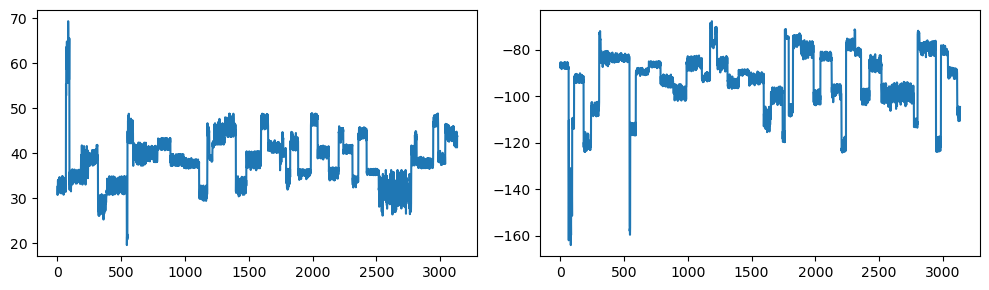

In [89]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(coords_df.lat)
ax[1].plot(coords_df.lng)
plt.tight_layout()

In [90]:
def add_rotations_of_locations(df):
    for angle in [15, 30, 45]:
        df[f'rot_{angle}_x'] = (np.cos(np.radians(angle)) * df['lat']) + \
                                (np.sin(np.radians(angle)) * df['lng'])
        
        df[f'rot_{angle}_y'] = (np.cos(np.radians(angle)) * df['lat']) - \
                                (np.sin(np.radians(angle)) * df['lng'])
        
    return df
# # cols = ['rot_15_x', 'rot_15_y', 'rot_30_x', 'rot_30_y', 'rot_45_x', 'rot_45_y']
# coords_df = add_rotations_of_locations(coords_df)

In [91]:
coords_df.lng = coords_df.lng / 100.0
coords_df.lng = coords_df.lng.astype('float32')
coords_df.lat = coords_df.lat / 100.0
coords_df.lat = coords_df.lat.astype('float32')

In [92]:
for split in range(cfg.num_month_splits):

    # Train:
    fp1 = file_paths_save['train_prepared'][split]
    train_df = pd.read_parquet(fp1)

    train_df = pd.merge(train_df, coords_df, on='cfips', how='inner')

    print(train_df.shape)

    # Save:
    train_df.to_parquet(fp1)
    print('saved', fp1)

    # Val:
    fp2 = file_paths_save['val_prepared'][split]
    val_df = pd.read_parquet(fp2)

    val_df = pd.merge(val_df, coords_df, on='cfips', how='inner')

    # Save:
    val_df.to_parquet(fp2)
    print('saved', fp2)

    # Test:
    if split == 0:
        fp3 = file_paths_save['test_prepared'][split]
        test_df = pd.read_parquet(fp3)
        
        test_df = pd.merge(test_df, coords_df, on='cfips', how='inner')

        # Save:
        test_df.to_parquet(fp3)
        print('saved', fp3)

(3135, 179)
saved /kaggle/working/prepared_data/train/train_0.parquet
saved /kaggle/working/prepared_data/val/val_0.parquet
saved /kaggle/working/prepared_data/test/test_0.parquet
(3135, 179)
saved /kaggle/working/prepared_data/train/train_1.parquet
saved /kaggle/working/prepared_data/val/val_1.parquet
(3135, 179)
saved /kaggle/working/prepared_data/train/train_2.parquet
saved /kaggle/working/prepared_data/val/val_2.parquet
(3135, 179)
saved /kaggle/working/prepared_data/train/train_3.parquet
saved /kaggle/working/prepared_data/val/val_3.parquet
(3135, 179)
saved /kaggle/working/prepared_data/train/train_4.parquet
saved /kaggle/working/prepared_data/val/val_4.parquet


In [93]:
train_df.isna().any().sum()

0

In [94]:
train_df

,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,median_hh_inc_2021_diff,median_hh_inc_2020_diff,pct_college_2021_diff,pct_college_2020_diff,adult2020,adult2021,population_range,population_change,lng,lat
0,1001,3.336785,3.334431,3.296781,3.286307,3.200948,3.203320,3.186722,3.219917,3.210433,...,4.678001,-0.749001,-0.3,0.6,4.249600,4.443800,3,4.569842,-0.866429,0.325351
1,1003,7.945311,7.823300,7.733397,7.930010,7.900597,7.832168,7.802155,7.918605,7.984033,...,2.590000,3.436001,0.4,-0.8,17.129601,17.810499,5,3.974991,-0.877227,0.307278
2,1005,1.196728,1.206827,1.186629,1.151890,1.151890,1.136930,1.121971,1.156876,1.146903,...,1.431999,2.465000,-0.6,-0.3,1.980400,1.999500,2,0.964452,-0.853911,0.318701
3,1007,1.264755,1.236650,1.214165,1.209271,1.231665,1.186877,1.186877,1.209271,1.237263,...,2.556000,4.179001,0.5,0.9,1.779000,1.780000,2,0.056211,-0.871268,0.329984
4,1009,1.797986,1.777708,1.752923,1.752009,1.733947,1.731690,1.729432,1.711370,1.715886,...,3.908001,-0.436001,0.4,0.3,4.438300,4.520100,3,1.843048,-0.865670,0.339809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,56037,2.848763,2.892446,2.926768,3.039970,3.093138,3.255770,3.362107,3.452806,3.434040,...,3.283997,-1.459000,-1.3,-1.1,3.204900,3.151400,3,-1.669319,-1.088794,0.416598
3131,56039,25.636610,25.438322,25.532248,25.846514,25.666065,25.628914,25.517462,25.719137,25.602377,...,7.445000,2.375000,1.1,-1.7,1.916400,1.916900,2,0.026091,-1.105897,0.439346
3132,56041,4.023147,3.954257,3.754478,3.777747,3.481318,3.501999,3.481318,3.439956,3.364125,...,2.648003,9.055000,-0.3,1.5,1.451600,1.464100,2,0.861119,-1.105474,0.412875
3133,56043,3.010753,3.027295,3.027295,3.058357,3.058357,3.124483,3.058357,3.107952,3.124483,...,4.965000,3.147999,2.2,-0.4,0.604500,0.600000,1,-0.744417,-1.076823,0.439044


# Us indicator features, COEST

In [95]:
co_est_df = pd.read_csv('/kaggle/input/us-indicator/co-est2021-alldata.csv', encoding='latin-1')
co_est_df["cfips"] = co_est_df.STATE*1000 + co_est_df.COUNTY

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
co_est_df[['ESTIMATESBASE2020', 'GQESTIMATESBASE2020']] = scaler.fit_transform(co_est_df[['ESTIMATESBASE2020', 'GQESTIMATESBASE2020']])

co_est_df.SUMLEV = co_est_df.SUMLEV.apply(lambda x: 0 if x==40 else 1)

co_est_df = co_est_df.drop(['STATE', 'COUNTY', 'STNAME', 'CTYNAME'], axis=1)

In [96]:
both_years_cols_pref = [
    'POPESTIMATE',
    'NPOPCHG',
    'BIRTHS',
    'DEATHS',
    'NATURALCHG',
    'INTERNATIONALMIG',
    'DOMESTICMIG',
    'NETMIG',
    'RESIDUAL',
    'GQESTIMATES',
]

In [97]:
co_est_diff_perc_cols = []
for col in both_years_cols_pref:
#     print(col)
    new_col = f'{col}_diff_perc_2020'
    co_est_df[new_col] = co_est_df[f'{col}2021'] / (1e-6 + co_est_df[f'{col}2020']) - 1
    co_est_df[new_col] = co_est_df[new_col].clip(-10,10)
    co_est_diff_perc_cols.append(new_col)
    
    new_col = f'{col}_diff_perc_2021'
    co_est_df[new_col] = co_est_df[f'{col}2020'] / (1e-6 + co_est_df[f'{col}2021']) - 1
    co_est_df[new_col] = co_est_df[new_col].clip(-10,10)
    co_est_diff_perc_cols.append(new_col)
    
    del co_est_df[f'{col}2021']
    del co_est_df[f'{col}2020']

In [98]:
# Downcast:
for k, v in co_est_df.dtypes.items():
    if v == 'int32' or v == 'int64':
        co_est_df[k] = pd.to_numeric(co_est_df[k], downcast='signed')
    elif v=='float64':
        co_est_df[k] = pd.to_numeric(co_est_df[k], downcast='float')

In [99]:
display_num_dtypes(co_est_df)

{dtype('int8'): 3, dtype('float32'): 28, dtype('int32'): 1}

In [100]:
print(list(co_est_df.columns))

['SUMLEV', 'REGION', 'DIVISION', 'ESTIMATESBASE2020', 'GQESTIMATESBASE2020', 'RBIRTH2021', 'RDEATH2021', 'RNATURALCHG2021', 'RINTERNATIONALMIG2021', 'RDOMESTICMIG2021', 'RNETMIG2021', 'cfips', 'POPESTIMATE_diff_perc_2020', 'POPESTIMATE_diff_perc_2021', 'NPOPCHG_diff_perc_2020', 'NPOPCHG_diff_perc_2021', 'BIRTHS_diff_perc_2020', 'BIRTHS_diff_perc_2021', 'DEATHS_diff_perc_2020', 'DEATHS_diff_perc_2021', 'NATURALCHG_diff_perc_2020', 'NATURALCHG_diff_perc_2021', 'INTERNATIONALMIG_diff_perc_2020', 'INTERNATIONALMIG_diff_perc_2021', 'DOMESTICMIG_diff_perc_2020', 'DOMESTICMIG_diff_perc_2021', 'NETMIG_diff_perc_2020', 'NETMIG_diff_perc_2021', 'RESIDUAL_diff_perc_2020', 'RESIDUAL_diff_perc_2021', 'GQESTIMATES_diff_perc_2020', 'GQESTIMATES_diff_perc_2021']


In [101]:
fp1 = file_paths_save['train_prepared'][split]
train_df = pd.read_parquet(fp1)

print(train_df.shape)
train_df = pd.merge(train_df, co_est_df, on='cfips', how='inner')
print(train_df.shape)

print(train_df.isna().any().sum())
train_df

(3135, 179)
(3135, 210)
0


,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,INTERNATIONALMIG_diff_perc_2020,INTERNATIONALMIG_diff_perc_2021,DOMESTICMIG_diff_perc_2020,DOMESTICMIG_diff_perc_2021,NETMIG_diff_perc_2020,NETMIG_diff_perc_2021,RESIDUAL_diff_perc_2020,RESIDUAL_diff_perc_2021,GQESTIMATES_diff_perc_2020,GQESTIMATES_diff_perc_2021
0,1001,3.336785,3.334431,3.296781,3.286307,3.200948,3.203320,3.186722,3.219917,3.210433,...,10.000000,-1.000000,1.443299,-0.590717,1.494845,-0.599174,1.000000e+01,-1.000000e+00,-2.262444e-09,-2.262444e-09
1,1003,7.945311,7.823300,7.733397,7.930010,7.900597,7.832168,7.802155,7.918605,7.984033,...,-10.000000,-1.015873,3.472296,-0.776401,3.516832,-0.778606,9.250001e+00,-9.024390e-01,-4.593477e-10,-4.593477e-10
2,1005,1.196728,1.206827,1.186629,1.151890,1.151890,1.136930,1.121971,1.156876,1.146903,...,10.000000,-1.000000,-10.000000,-1.030612,-10.000000,-1.030928,-2.000001e+00,-1.999999e+00,-3.585514e-10,-3.585514e-10
3,1007,1.264755,1.236650,1.214165,1.209271,1.231665,1.186877,1.186877,1.209271,1.237263,...,10.000000,-1.000000,-8.357143,-1.135922,-8.404762,-1.135048,-1.000000e+01,-1.000000e+00,-4.849660e-10,-4.849660e-10
4,1009,1.797986,1.777708,1.752923,1.752009,1.733947,1.731690,1.729432,1.711370,1.715886,...,10.000000,-1.000000,7.235294,-0.878571,7.352941,-0.880282,-5.500002e+00,-1.222222e+00,-2.227171e-09,-2.227171e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,56037,2.848763,2.892446,2.926768,3.039970,3.093138,3.255770,3.362107,3.452806,3.434040,...,10.000000,-0.944444,4.654867,-0.823161,4.544643,-0.819646,-2.999999e+00,-1.500000e+00,-1.388889e-09,-1.388889e-09
3131,56039,25.636610,25.438322,25.532248,25.846514,25.666065,25.628914,25.517462,25.719137,25.602377,...,2.999998,-0.750000,-10.000000,-1.021053,10.000000,-1.000000,-9.999990e-07,-9.999990e-07,-4.651163e-09,-4.651163e-09
3132,56041,4.023147,3.954257,3.754478,3.777747,3.481318,3.501999,3.481318,3.439956,3.364125,...,10.000000,-1.000000,-10.000000,-1.083969,-10.000000,-1.082090,-1.000000e+00,1.000000e+01,-5.347593e-09,-5.347593e-09
3133,56043,3.010753,3.027295,3.027295,3.058357,3.058357,3.124483,3.058357,3.107952,3.124483,...,-1.000000,-1.000000,-7.692308,-1.149425,-7.692308,-1.149425,-1.000000e+01,-1.000000e+00,-8.403362e-09,-8.403362e-09


In [102]:
for split in range(cfg.num_month_splits):

    # Train:
    fp1 = file_paths_save['train_prepared'][split]
    train_df = pd.read_parquet(fp1)

    train_df = pd.merge(train_df, co_est_df, on='cfips', how='inner')

    print(train_df.shape)

    # Save:
    train_df.to_parquet(fp1)
    print('saved', fp1)

    # Val:
    fp2 = file_paths_save['val_prepared'][split]
    val_df = pd.read_parquet(fp2)

    val_df = pd.merge(val_df, co_est_df, on='cfips', how='inner')

    # Save:
    val_df.to_parquet(fp2)
    print('saved', fp2)

    # Test:
    if split == 0:
        fp3 = file_paths_save['test_prepared'][split]
        test_df = pd.read_parquet(fp3)
        
        test_df = pd.merge(test_df, co_est_df, on='cfips', how='inner')

        # Save:
        test_df.to_parquet(fp3)
        print('saved', fp3)

(3135, 210)
saved /kaggle/working/prepared_data/train/train_0.parquet
saved /kaggle/working/prepared_data/val/val_0.parquet
saved /kaggle/working/prepared_data/test/test_0.parquet
(3135, 210)
saved /kaggle/working/prepared_data/train/train_1.parquet
saved /kaggle/working/prepared_data/val/val_1.parquet
(3135, 210)
saved /kaggle/working/prepared_data/train/train_2.parquet
saved /kaggle/working/prepared_data/val/val_2.parquet
(3135, 210)
saved /kaggle/working/prepared_data/train/train_3.parquet
saved /kaggle/working/prepared_data/val/val_3.parquet
(3135, 210)
saved /kaggle/working/prepared_data/train/train_4.parquet
saved /kaggle/working/prepared_data/val/val_4.parquet


In [103]:
train_df.isna().any().sum()

0

In [104]:
train_df

,cfips,mb_density_0,mb_density_1,mb_density_2,mb_density_3,mb_density_4,mb_density_5,mb_density_6,mb_density_7,mb_density_8,...,INTERNATIONALMIG_diff_perc_2020,INTERNATIONALMIG_diff_perc_2021,DOMESTICMIG_diff_perc_2020,DOMESTICMIG_diff_perc_2021,NETMIG_diff_perc_2020,NETMIG_diff_perc_2021,RESIDUAL_diff_perc_2020,RESIDUAL_diff_perc_2021,GQESTIMATES_diff_perc_2020,GQESTIMATES_diff_perc_2021
0,1001,3.336785,3.334431,3.296781,3.286307,3.200948,3.203320,3.186722,3.219917,3.210433,...,10.000000,-1.000000,1.443299,-0.590717,1.494845,-0.599174,1.000000e+01,-1.000000e+00,-2.262444e-09,-2.262444e-09
1,1003,7.945311,7.823300,7.733397,7.930010,7.900597,7.832168,7.802155,7.918605,7.984033,...,-10.000000,-1.015873,3.472296,-0.776401,3.516832,-0.778606,9.250001e+00,-9.024390e-01,-4.593477e-10,-4.593477e-10
2,1005,1.196728,1.206827,1.186629,1.151890,1.151890,1.136930,1.121971,1.156876,1.146903,...,10.000000,-1.000000,-10.000000,-1.030612,-10.000000,-1.030928,-2.000001e+00,-1.999999e+00,-3.585514e-10,-3.585514e-10
3,1007,1.264755,1.236650,1.214165,1.209271,1.231665,1.186877,1.186877,1.209271,1.237263,...,10.000000,-1.000000,-8.357143,-1.135922,-8.404762,-1.135048,-1.000000e+01,-1.000000e+00,-4.849660e-10,-4.849660e-10
4,1009,1.797986,1.777708,1.752923,1.752009,1.733947,1.731690,1.729432,1.711370,1.715886,...,10.000000,-1.000000,7.235294,-0.878571,7.352941,-0.880282,-5.500002e+00,-1.222222e+00,-2.227171e-09,-2.227171e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,56037,2.848763,2.892446,2.926768,3.039970,3.093138,3.255770,3.362107,3.452806,3.434040,...,10.000000,-0.944444,4.654867,-0.823161,4.544643,-0.819646,-2.999999e+00,-1.500000e+00,-1.388889e-09,-1.388889e-09
3131,56039,25.636610,25.438322,25.532248,25.846514,25.666065,25.628914,25.517462,25.719137,25.602377,...,2.999998,-0.750000,-10.000000,-1.021053,10.000000,-1.000000,-9.999990e-07,-9.999990e-07,-4.651163e-09,-4.651163e-09
3132,56041,4.023147,3.954257,3.754478,3.777747,3.481318,3.501999,3.481318,3.439956,3.364125,...,10.000000,-1.000000,-10.000000,-1.083969,-10.000000,-1.082090,-1.000000e+00,1.000000e+01,-5.347593e-09,-5.347593e-09
3133,56043,3.010753,3.027295,3.027295,3.058357,3.058357,3.124483,3.058357,3.107952,3.124483,...,-1.000000,-1.000000,-7.692308,-1.149425,-7.692308,-1.149425,-1.000000e+01,-1.000000e+00,-8.403362e-09,-8.403362e-09
